In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot roo
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/mnt/c/Users/Administrator/master/git/astrobot/resources/epw/philadelphia/philadelphia.epw'

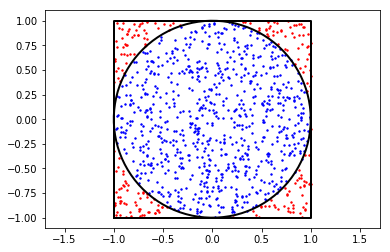

In [96]:
import scipy.stats as st

# Theory: unit square / unit circle = pi
# r^2 / pi r^2 = pi

def circle_contains_point(pt, r):
    return r <= np.sqrt(np.sum(pt ** 2))

def generate_point_prob_func(r, sample_num):
    """Function to generate points uniformly within unit square."""
    minx, maxx = -r, r
    miny, maxy = -r, r
    dist_x = np.random.uniform(minx, maxx, sample_num)
    dist_y = np.random.uniform(miny, maxy, sample_num)
    def _generate(i):
        return np.array([dist_x[i], dist_y[i]])
    return _generate

r = 1.0 

# Draw unit circle 
theta = np.linspace(0, 2 * np.pi, 100)
x_circle = np.cos(theta) * r
y_circle = np.sin(theta) * r

# Draw unit square 
x_square = np.array([0, 2*r, 2*r, 0, 0]) - r
y_square = np.array([0, 0, 2*r, 2*r, 0]) - r

# plot
plt.plot(x_circle, y_circle, 'black', linewidth=2)
plt.plot(x_square, y_square, 'black', linewidth=2)

# Monte Carlo sampling
N = 1000  # trials
gen_pt_fx = generate_point_prob_func(r, N)
burn_num = 10

# Pi pred
area_square, area_circle = 0, 0
pi_approx = np.zeros(N - burn_num)

# Confidence intervals 
percentiles = np.arange(0.025, 1.0, 0.025)
zscores = st.norm.ppf(percentiles)
ci = np.zeros((N - burn_num, zscores.size))
for i in range(N):
    pt = gen_pt_fx(i)
    if circle_contains_point(pt, r):
        color = 'red'
        area_circle += 1.0
    else:
        color = 'blue'
        area_square += 1.0

    if i > burn_num:
        pi_approx[i-burn_num] = area_square / area_circle
        sd = np.sqrt(np.sum(pi_approx ** 2) / (N - burn_num))    
        ci[i-burn_num] = zscores * sd / np.sqrt(i)

    _ = plt.scatter([pt[0]], [pt[1]], color=color, s=2)

_ = plt.axis('equal')

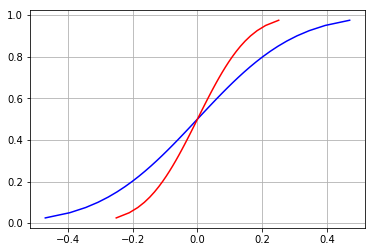

In [109]:

# f, a = plt.subplots(1, 2, figsize=(10, 5))

# # Pi convergence
# print(pi_approx[-1])
# a[0].plot(np.arange(N-burn_num), pi_approx)
# a[0].plot(np.arange(N-burn_num), np.ones(N-burn_num)*np.pi, color='red')
# a[0].set_title('Pi ~ {} w/ {} draws'.format(pi_approx[-1].round(2), N))

# # CI
# idxes = [0, int((N-burn_num-1) / 2), N-burn_num-1]
# for idx in idxes:
#     print(idx, ci.shape[0])
#     percs = ci[idx, :]
#     a[1].plot(np.arange(percs.shape[0]), percs, marker='o')

#print(percentiles)
#ci[500, :].round(2)

plt.plot(ci[5, :], percentiles, color='blue')
plt.plot(ci[989, :], percentiles, color='red')
plt.grid()

